In [1]:
# Build Your Own Sentiment Analysis Model Assignment
# DSC 550
# Week 5
# Data Mining Assignment Week 5
# David Berberena
# 4/14/2024

# Program Start

## 1. Get the stemmed data using the same process you did in Week 3.

In [2]:
# To begin, I need to import the needed libraries that yielded the stemmed data from the Week 3 assignment (Pandas for data 
# manipulation and file reading, and NLTK for stopword deletion and stemming abilities).

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# To import the labeled training dataset properly, I need to add the delimiter argument present in the read_csv() function 
# and set it to '\t' to properly read in TSV (tab separated files) files. 

movie_data = pd.read_csv('labeledTrainData.tsv', delimiter='\t')

# The head() function will be employed here to verify that the data has been loaded in properly.

movie_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
# To replicate the same stemmed data as in Week 3, I need to make sure that all of the characters in the review variable 
# are lowercase. The string formatting str.lower() function has the ability to make all text lowercase, so I will be using 
# this against the review variable.

movie_data['review'] = movie_data['review'].str.lower()

# The head() function is meant to show the changes made to the data frame.

movie_data.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [4]:
# Just like in Week 3, I need to remove any special characters and punctuation in the review variable. This step involves 
# applying a lambda function that checks each review (converted into a string value since it has not been done yet) for 
# alphanumeric characters (with the isalnum() function) and space characters (using the isspace() function) and keeps them 
# (removing the remaining punctuation and special characters by default). The lambda function finally joins each review 
# back together at the whitespaces left by the exclusion of the unwanted characters.

movie_data['review'] = movie_data['review'].apply(
    lambda review: ''.join(str(character) for character in review if character.isalnum() or character.isspace()))

# The head() function is meant to show the changes made to the data frame.

movie_data.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hines...
2,7759_3,0,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [5]:
# Continuing with the replication of Week 3's stemmed data, I need to remove the stopwords within the review variable. 
# To have access to the stopwords in the English language, I used the words() function in stopwords and specified english 
# as the language whose stopwords I wish to use and stored those words into a set variable to call on in my function to 
# remove these stopwords from the review variable. 

stop_words = set(stopwords.words('english'))

# The delete_stopwords() function I made is similar to the lambda function that removed the special characters and 
# punctuation, except that I encased the code in a recallable function. The function works to split the review into 
# individual words, analyze them to identify the stopwords and keep the words that are not stopwords, then join the words 
# to keep with the join() function where the stopwords were deleted. The joined review is returned at the end. 

def delete_stopwords(review):
    kept_words = [word for word in review.split() if word not in stop_words]
    return ' '.join(kept_words)

# The above function is applied to each review in the review variable with the apply() function.

movie_data['review'] = movie_data['review'].apply(delete_stopwords)

# The head() function is meant to show the changes made to the data frame.

movie_data.head()

,id,sentiment,review
0,5814_8,1,stuff going moment mj ive started listening mu...
1,2381_9,1,classic war worlds timothy hines entertaining ...
2,7759_3,0,film starts manager nicholas bell giving welco...
3,3630_4,0,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...


In [6]:
# The final step is to actually stem the data with PorterStemmer(). The function generated here follows the same logic as 
# the previous function, with the PorterStemmer() function iterating over every word in the review with the split() 
# function, then the stemmed words are joined back together at the place where they were stemmed.

def Porter_Stemming(review):
    stemmed_words = [PorterStemmer().stem(word) for word in review.split()]
    return ' '.join(stemmed_words)

# The above function is applied to each review in the review variable with the apply() function.

movie_data['review'] = movie_data['review'].apply(Porter_Stemming)

# The head() function is meant to show the changes made to the data frame.

movie_data.head()

,id,sentiment,review
0,5814_8,1,stuff go moment mj ive start listen music watc...
1,2381_9,1,classic war world timothi hine entertain film ...
2,7759_3,0,film start manag nichola bell give welcom inve...
3,3630_4,0,must assum prais film greatest film opera ever...
4,9495_8,1,superbl trashi wondrous unpretenti 80 exploit ...


## 2. Split this into a training and test set.

In [7]:
# This requires the importing of the train_test_split() function from Sci-kitlearn just as Week 4's assignment required.

from sklearn.model_selection import train_test_split

# I am randomly splitting the data by the same 80-20 ratio as last week's assignment

review_train, review_test = train_test_split(movie_data, test_size=0.2, random_state=123)

# To show that the review column was split properly, I will print the dimensions of each dataset to see if the 80-20 split 
# worked as it should. 

print('Training set shape:', review_train['review'].shape)
print('Test set shape:', review_test['review'].shape)

Training set shape: (20000,)
Test set shape: (5000,)


## 3. Fit and apply the tf-idf vectorization to the training set.

In [8]:
# The TFIDFVectorizer function needs to be imported frok Sci=kitlearn to accomplish this task.

from sklearn.feature_extraction.text import TfidfVectorizer

# For the purposes of this assignment, the TD-IDF vectorization process on the training set is performed so the vectorizer 
# can learn the vocabulary within the training set and transform the text into vectors by applying the learned logic.

vectorizer = TfidfVectorizer()

review_train_tfidf = vectorizer.fit_transform(review_train['review'])

# The shape() function is used to directly call the dimensions of the matrix that has been created.

print("The dimensions of the review training set TF-IDF matrix are", review_train_tfidf.shape)

The dimensions of the review training set TF-IDF matrix are (20000, 80995)


## 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [9]:
# To answer the question of why we would only be applying the TF-IDF vectorizer to the test set and not also be fitting it, 
# I believe that since we already lesrned the vocabulary from the training set, we need to subject the test set to the 
# terms only in the training set to make accurate predictions. If we were to fit the test set before applying the 
# vectorizer, we would end up having the vectorizer learn both the test and training set vocabulary, which would then 
# introduce all of the vocabulary from both sets to apply to the test set, as opposed to the vocabulary only from the 
# training set. Overall, if we are to test the test set, only the training set is needed, not the test set itself.

# To apply but not fit the TF-IDF vectorizer, we need to use the transform() function and not the fit_transform() function.

review_test_tfidf = vectorizer.transform(review_test['review'])

# The shape() function is used to directly call the dimensions of the matrix that has been created.

print("The dimensions of the review test set TF-IDF matrix are", review_test_tfidf.shape)

The dimensions of the review test set TF-IDF matrix are (5000, 80995)


## 5. Train a logistic regression using the training data.

In [10]:
# To create a logistic regression model, the LogisticRegression() function from Sci-kitlearn is needed.

from sklearn.linear_model import LogisticRegression

# Now the training data can be placed into a logistic regression model using the LogisticRegression() function. To attach 
# the correct amount of labels to the vectorizer, I am using the to_list() function to find all labels assigned to the 
# vectors and store them as a list for access during the logistic regression model creation. 

review_logit_model = LogisticRegression()

review_logit_model.fit(review_train_tfidf, review_train['sentiment'])

LogisticRegression()

## 6. Find the model accuracy on test set.

In [11]:
# To find the accuracy of the logistic regression model, the metrics class of Sci-kitlearn has an accuracy_score() function.

from sklearn.metrics import accuracy_score

# To create predictions for the logistic regression model, I will need to use the predict() on the test TDIDF data.

predictions = review_logit_model.predict(review_test_tfidf)

# To use the accuracy_score() function, I am testing the review_test sentiment column against the predictions generated 
# from the test set vectorizer.

logit_accuracy = accuracy_score(review_test['sentiment'], predictions)

print('The accuracy of the logistic regression model is:', logit_accuracy)

The accuracy of the logistic regression model is: 0.8874


## 7. Create a confusion matrix for the test set predictions.

In [12]:
# The confusion matrix can be generated by accessing yet another one of Scikit-learn's functions: confusion_matrix().

from sklearn.metrics import confusion_matrix

sentiment_test_confusion_matrix = confusion_matrix(review_test['sentiment'], predictions)

print('Confusion Matrix for Test Set Predictions')
print(sentiment_test_confusion_matrix)

Confusion Matrix for Test Set Predictions
[[2156  312]
 [ 251 2281]]


## 8. Get the precision, recall, and F1-score for the test set predictions.

In [13]:
# For the precision, recall, and F-1 score statsistics, I can access the indices of the confusion matrix and store the 
# values into variables which I can then use to calculate each metric using their individual formulas.

true_pos = sentiment_test_confusion_matrix[1, 1]
true_neg = sentiment_test_confusion_matrix[0, 0]
false_pos = sentiment_test_confusion_matrix[0, 1]  
false_neg = sentiment_test_confusion_matrix[1, 0]

precision = true_pos / (true_pos + false_pos)

recall = true_pos / (true_pos + false_neg)

f1_score = 2 * (precision * recall) / (precision + recall)

print('Additional Test Set Prediction Scores')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Additional Test Set Prediction Scores
Precision: 0.8796760509062862
Recall: 0.90086887835703
F1-Score: 0.8901463414634146


## 9. Create a ROC curve for the test set.

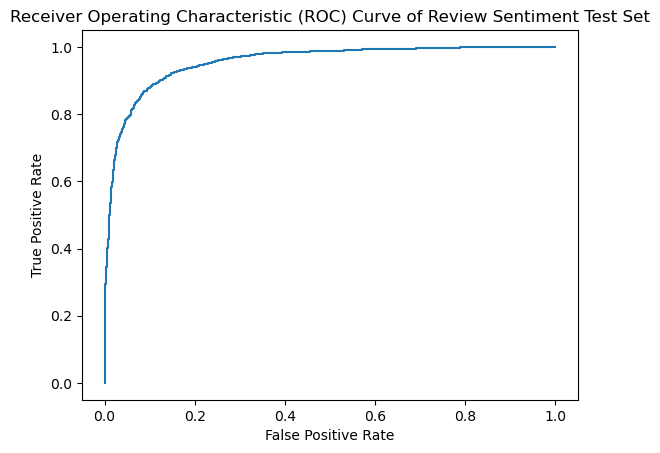

In [14]:
# To generate the ROC curve for the test set, Sci-kitlearn contains the roc_curve() and auc()) functions that are imported. 

from sklearn.metrics import roc_curve, auc

# To use the roc_curve() function, I will be using the predict_proba() function from the LogisticRegression class imported  
# earlier to store the predicted probabilities from the test set TF-IDF vectors. Then only the positive predicted 
# probabilities will be stored into a variable for the roc_curve() function to use in its generation.

predicted_probabilities = review_logit_model.predict_proba(review_test_tfidf)

pos_probs = predicted_probabilities[:, 1]

f_pos_rate, t_pos_rate, thresholds = roc_curve(review_test['sentiment'], pos_probs)
roc_auc = auc(f_pos_rate, t_pos_rate)

# To graph the ROC curve, I will be importing Matplotlib.

import matplotlib.pyplot as plt

plt.plot(f_pos_rate, t_pos_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Review Sentiment Test Set')
plt.show()

## 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

In [15]:
# I have decided to use the K-Nearest Neighbors classification model, which can be accessed from the Scikit-learn library. 

from sklearn.neighbors import KNeighborsClassifier

knn_review_model = KNeighborsClassifier()

knn_review_model.fit(review_train_tfidf, review_train['sentiment'])

KNeighborsClassifier()

In [16]:
# Now to find the accuracy score from the KNN classifier model

# To create predictions for the logistic regression model, I will need to use the predict() on the test TDIDF data.

knn_predictions = knn_review_model.predict(review_test_tfidf)

# To use the accuracy_score() function, I am testing the review_test sentiment column against the predictions generated 
# from the test set vectorizer.

knn_accuracy = accuracy_score(review_test['sentiment'], knn_predictions)

print('The accuracy of the K-Nearest Neighbor classification model is:', knn_accuracy)

The accuracy of the K-Nearest Neighbor classification model is: 0.782


In [17]:
# Next is the confusion matrix for the KNN test set predictions.

knn_test_confusion_matrix = confusion_matrix(review_test['sentiment'], knn_predictions)

print('Confusion Matrix for the KNN Test Set Predictions')
print(knn_test_confusion_matrix)

Confusion Matrix for the KNN Test Set Predictions
[[1789  679]
 [ 411 2121]]


In [18]:
# The precision, recall, and F-1 score metrics need to be calculated next. 

knn_true_pos = knn_test_confusion_matrix[1, 1]
knn_true_neg = knn_test_confusion_matrix[0, 0]
knn_false_pos = knn_test_confusion_matrix[0, 1]  
knn_false_neg = knn_test_confusion_matrix[1, 0]

knn_precision = knn_true_pos / (knn_true_pos + knn_false_pos)

knn_recall = knn_true_pos / (knn_true_pos + knn_false_neg)

knn_f1_score = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

print('Additional KNN Test Set Prediction Scores')
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-Score:", knn_f1_score)

Additional KNN Test Set Prediction Scores
Precision: 0.7575
Recall: 0.8376777251184834
F1-Score: 0.7955738934733683


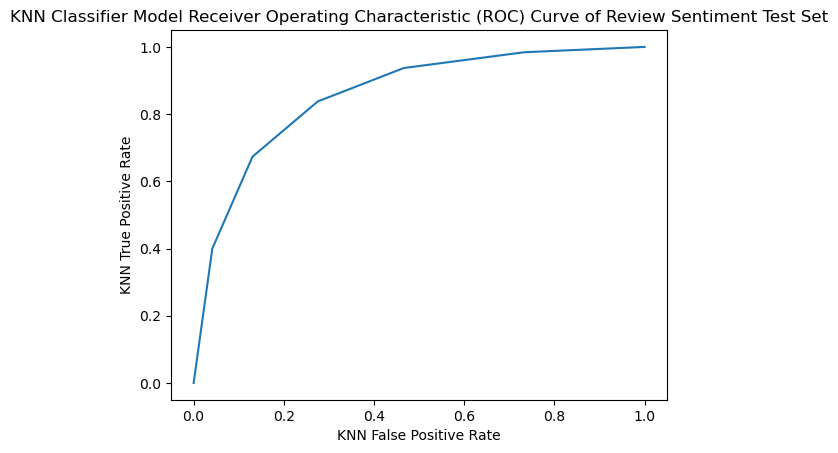

In [19]:
# The final criteria needed for the KNN classifier model is the ROC curve.

knn_predicted_probs = knn_review_model.predict_proba(review_test_tfidf)

knn_pos_probs = knn_predicted_probs[:, 1]

knn_fpr, knn_tpr, knn_thresholds = roc_curve(review_test['sentiment'], knn_pos_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.plot(knn_fpr, knn_tpr)
plt.xlabel('KNN False Positive Rate')
plt.ylabel('KNN True Positive Rate')
plt.title('KNN Classifier Model Receiver Operating Characteristic (ROC) Curve of Review Sentiment Test Set')
plt.show()